#### AVIATION RISK ANALYSIS

PROJECT OVERVIEW
Our company is planning to invest in the aviation industry by purchasing aircraft for both commercial and private use.Since we don’t have experience in this sector, we need to understand the potential risks involved with different types of aircraft.

 I therefore analyzed aviation accident data from the National Transportation Safety Board (NTSB), covering the years 1962 to 2023. The goal of this analysis is to identify which aircraft categories are safer based on historical incidents, and to make recommendations on which ones are better suited for our first investment.

BUSINESS OBJECTIVES
Before making any purchases, the company needs to know which types have lower accident rates. This will help us reduce risk and make better decisions in the new market.

I have been able to:
- Look at key safety factors like injuries, fatalities, and aircraft damage,
- Compared different types of aircraft to see which ones are the safest,
- Highlighted important trends and created visualizations that support business recommendations.

IMPORT PANDAS AND LOAD THE DATASET


In [60]:
#import pandas
import pandas as pd

In [61]:
#load the dataset
df = pd.read_csv('AviationData.csv', encoding='latin1', low_memory=False)


In [62]:
#show the first few rows of the dataset
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


CHECK THE STRUCTURE OF THE DATASET

Before starting the analysis, I want to see the structure of the dataset i.e how many rows and columns it has, what types of data are in each column, and whether there are any missing values that I need to handle.

CHECK THE DATASET INFO

In [63]:
#check the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

COUNT THE MISSING VALUES


In [64]:
# count the missing value in each column
df = pd.read_csv('AviationData.csv', encoding='latin1')
df.isnull().sum().sort_values(ascending=False)

C:\Users\USER\AppData\Local\Temp\ipykernel_17652\20935894.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('AviationData.csv', encoding='latin1')


Schedule                  76307
Air.carrier               72241
FAR.Description           56866
Aircraft.Category         56602
Longitude                 54516
Latitude                  54507
Airport.Code              38757
Airport.Name              36185
Broad.phase.of.flight     27165
Publication.Date          13771
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Fatal.Injuries      11401
Engine.Type                7096
Report.Status              6384
Purpose.of.flight          6192
Number.of.Engines          6084
Total.Uninjured            5912
Weather.Condition          4492
Aircraft.damage            3194
Registration.Number        1382
Injury.Severity            1000
Country                     226
Amateur.Built               102
Model                        92
Make                         63
Location                     52
Accident.Number               0
Investigation.Type            0
Event.Id                      0
Event.Date                    0
dtype: i

SUMMARY OF WHAT I FOUND

From the output above:
- There are a lot of missing values in some columns (e.g., "Weather_Condition", "Total_Serious_Injuries", etc.)
- Some columns may not be useful for analysis, depending on how complete or relevant the data is.
- I will need to clean the data by either removing or filling in missing values, and selecting only the columns that help answer the main business question (which aircraft are safest).

Next, I’ll start cleaning and preparing the data for analysis.


CLEANING THE DTASET

Some columns in the dataset aren’t helpful for my analysis, mostly because they have too many missing values or don’t relate to aircraft risk. I’ll start by dropping those.

For injury columns like "Total.Fatal.Injuries", "Total.Minor.Injuries", "Total.Serious.Injuries", and "Total.Uninjured", I’m going to fill any missing values with 0. This is because if the injury field was left blank, it probably means no injuries were reported.

I’m also keeping important columns like "Aircraft.damage", "Aircraft.Category", and "Weather.Condition", even though they have some missing data .

In [65]:
#create columns needed
columns_needed = ['Aircraft.Category', 'Broad.phase.of.flight', 'Total.Fatal.Injuries' , 'Make' , 'Model' , 'Event.Id' , 'Event.Date' , 'Injury.Severity' , 'Total.Serious.Injuries']
columns_needed

['Aircraft.Category',
 'Broad.phase.of.flight',
 'Total.Fatal.Injuries',
 'Make',
 'Model',
 'Event.Id',
 'Event.Date',
 'Injury.Severity',
 'Total.Serious.Injuries']

In [66]:

df = df[columns_needed].copy()
df

,Aircraft.Category,Broad.phase.of.flight,Total.Fatal.Injuries,Make,Model,Event.Id,Event.Date,Injury.Severity,Total.Serious.Injuries
0,NaN,Cruise,2.0,Stinson,108-3,20001218X45444,1948-10-24,Fatal(2),0.0
1,NaN,Unknown,4.0,Piper,PA24-180,20001218X45447,1962-07-19,Fatal(4),0.0
2,NaN,Cruise,3.0,Cessna,172M,20061025X01555,1974-08-30,Fatal(3),NaN
3,NaN,Cruise,2.0,Rockwell,112,20001218X45448,1977-06-19,Fatal(2),0.0
4,NaN,Approach,1.0,Cessna,501,20041105X01764,1979-08-02,Fatal(1),2.0
...,...,...,...,...,...,...,...,...,...
88884,NaN,NaN,0.0,PIPER,PA-28-151,20221227106491,2022-12-26,Minor,1.0
88885,NaN,NaN,0.0,BELLANCA,7ECA,20221227106494,2022-12-26,NaN,0.0
88886,Airplane,NaN,0.0,AMERICAN CHAMPION AIRCRAFT,8GCBC,20221227106497,2022-12-26,Non-Fatal,0.0
88887,NaN,NaN,0.0,CESSNA,210N,20221227106498,2022-12-26,NaN,0.0


HANDLING MISSING DATA

In [67]:
#check the sum of missing values
df.isnull().sum()

Aircraft.Category         56602
Broad.phase.of.flight     27165
Total.Fatal.Injuries      11401
Make                         63
Model                        92
Event.Id                      0
Event.Date                    0
Injury.Severity            1000
Total.Serious.Injuries    12510
dtype: int64

HANDLING MISSING CATEGORICAL DATA

In [68]:
#check for unique values in broad phase flight column
df['Broad.phase.of.flight'].value_counts(dropna=False)

Broad.phase.of.flight
NaN            27165
Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: count, dtype: int64

In [69]:
#filling missing rows with a new category "not known"
df['Broad.phase.of.flight']= df['Broad.phase.of.flight'].fillna('not known')
df['Broad.phase.of.flight']


0           Cruise
1          Unknown
2           Cruise
3           Cruise
4         Approach
           ...    
88884    not known
88885    not known
88886    not known
88887    not known
88888    not known
Name: Broad.phase.of.flight, Length: 88889, dtype: object

HANDLING NUMERICAL DATA

In [70]:
df['Total.Fatal.Injuries'].fillna(0,inplace=True)
df['Total.Serious.Injuries'].fillna(0,inplace=True)
df['Injury.Severity'].fillna(0,inplace=True)


C:\Users\USER\AppData\Local\Temp\ipykernel_17652\4105927042.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total.Fatal.Injuries'].fillna(0,inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_17652\4105927042.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

REMOVE THE WHITESPACES
Some columns in the dataset may contain extra spaces either at the beginning or end of the text.

To fix this, I’ll remove white spaces from:
- All column names
- All string (object) values in the dataset

In [71]:
# Remove leading spaces from column names
df.columns = df.columns.str.strip()

# Remove spaces from text entries in all object (string) columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()

In [72]:
df.dropna(subset=['Make', 'Model', 'Aircraft.Category', ], how='any', inplace=True)

CONFIRM IF THE DATASET IS WORKING

In [73]:
# Check again for missing values after cleaning
df.isnull().sum().sort_values(ascending=False)

Injury.Severity           882
Aircraft.Category           0
Broad.phase.of.flight       0
Make                        0
Total.Fatal.Injuries        0
Model                       0
Event.Id                    0
Event.Date                  0
Total.Serious.Injuries      0
dtype: int64

CHECK ON WHAT IS LEFT

In [74]:
df.head()

,Aircraft.Category,Broad.phase.of.flight,Total.Fatal.Injuries,Make,Model,Event.Id,Event.Date,Injury.Severity,Total.Serious.Injuries
5,Airplane,Climb,0.0,Mcdonnell Douglas,DC9,20170710X52551,1979-09-17,Non-Fatal,0.0
7,Airplane,Takeoff,0.0,Cessna,140,20020909X01562,1982-01-01,Non-Fatal,0.0
8,Airplane,Landing,0.0,Cessna,401B,20020909X01561,1982-01-01,Non-Fatal,0.0
12,Airplane,Cruise,0.0,Bellanca,17-30A,20020917X02148,1982-01-02,Non-Fatal,0.0
13,Airplane,Takeoff,1.0,Cessna,R172K,20020917X02134,1982-01-02,Fatal(1),0.0


ANALYSIS OF PATTERNS IN THE DATASET

I will start looking for patterns that will help me understand which aircraft are more risky than others.

I’ll begin by checking the total number of accidents by aircraft category. Then I’ll look at how many fatalities are linked to each category.


In [75]:
# Count how many accidents occurred for each aircraft category
df['Aircraft.Category'].value_counts()

Aircraft.Category
Airplane             27580
Helicopter            3435
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: count, dtype: int64

VISUALISATIONS

ACCIDENTSBY PHASE OF FLIGHT

<function matplotlib.pyplot.show(close=None, block=None)>

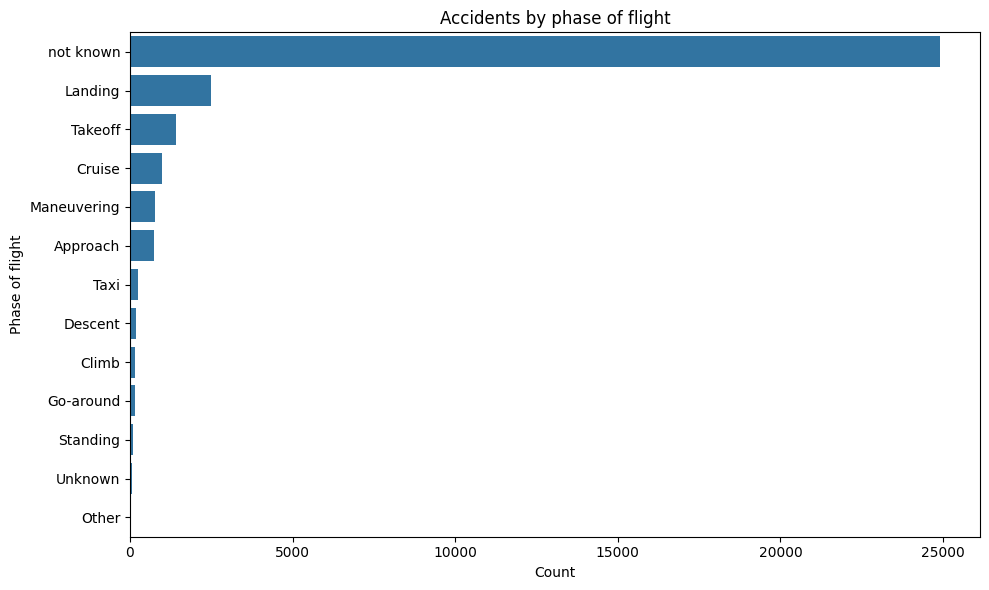

In [76]:
#check the accidents by phase of flight
#this is to identify the riskiest phases
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.countplot(data=df , y= 'Broad.phase.of.flight' , order=df['Broad.phase.of.flight'].value_counts().index)
plt.title('Accidents by phase of flight')
plt.xlabel('Count')
plt.ylabel('Phase of flight')
plt.tight_layout()
plt.show

The Landing and Takeoff phases show the highest number of accidents.

Approach and Climb may also appear to be risky.

The Cruise phase has fewer accidents since it’s a more stable phase of flight.

Maneuvering may show moderate frequency, associated with small aircraft and training flights.



AIRCRAFT MODELS BY ACCIDENT COUNT

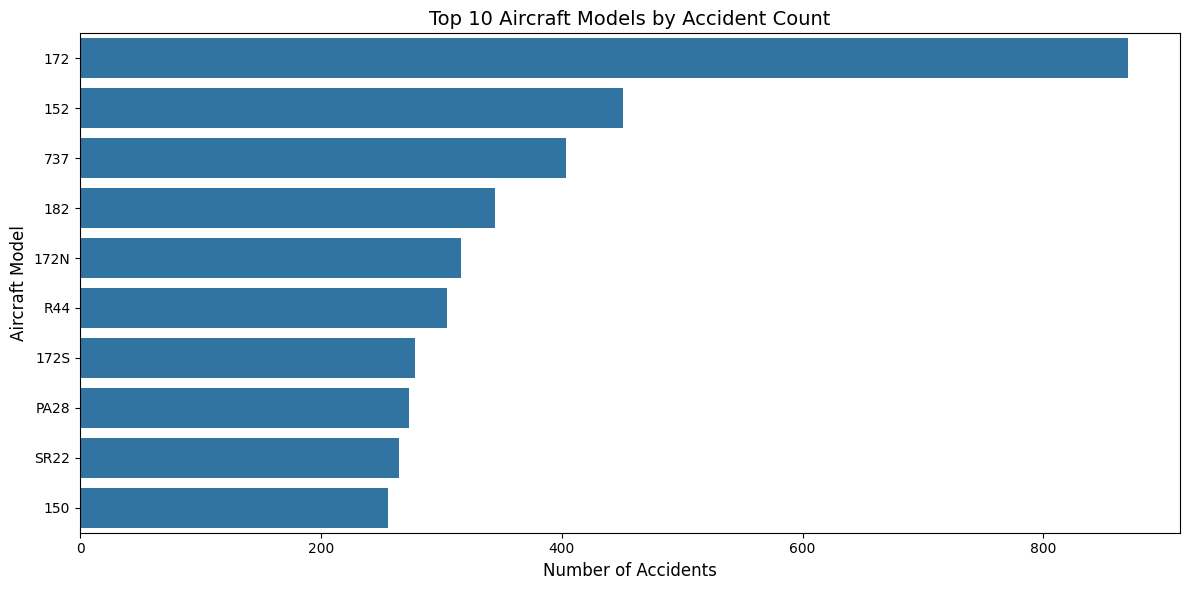

In [77]:
#check the top 10 aircraft models with most accidents
plt.figure(figsize= (12,6))
top_models = df['Model'].value_counts().head(10)
sns.barplot(x=top_models.values, y=top_models.index)
plt.title('Top 10 Aircraft Models by Accident Count', fontsize=14)
plt.xlabel('Number of Accidents' , fontsize = 12)
plt.ylabel('Aircraft Model' , fontsize = 12)
plt.tight_layout()
plt.show()

Certain models have higher accident counts because they are more flown.

Examples include Cessna 172, Piper PA-28, or Beechcraft models, which are widely used in general aviation .

High accident numbers don’t always mean the aircraft is unsafe—it may reflect higher usage.



CHECK THE BEHAVIOUR OF ACCIDENTG RATES IF THEY ARE INCREASING OR DECREASING WITH TIME

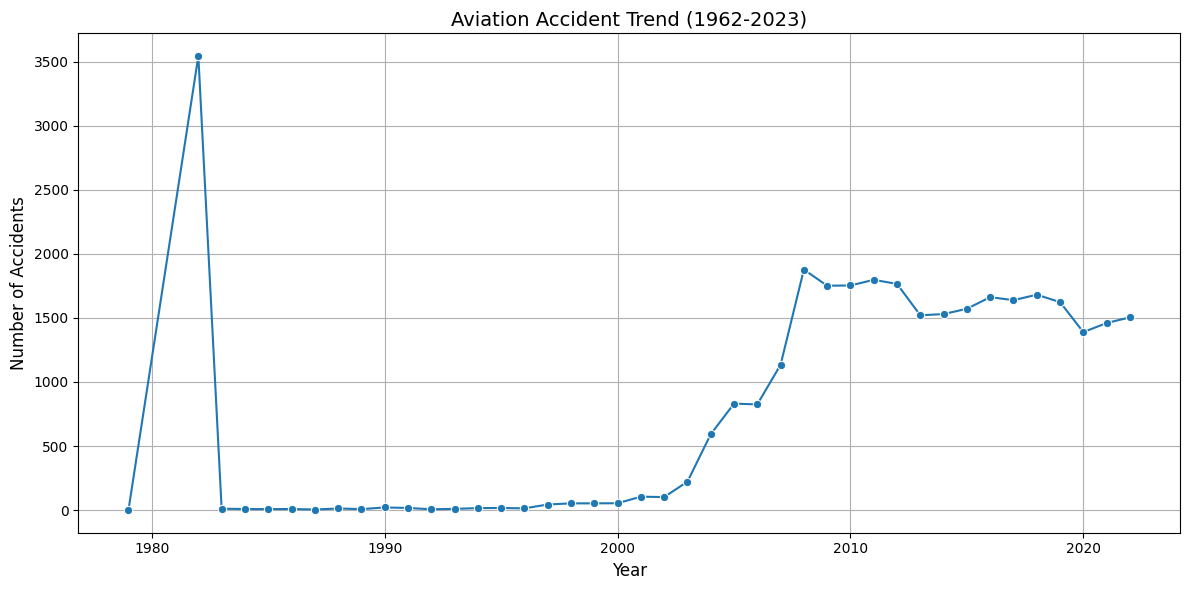

In [78]:
# Convert Event.Date to datetime and extract year
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')
df['Year'] = df['Event.Date'].dt.year

plt.figure(figsize=(12,6))
yearly_accidents = df['Year'].value_counts().sort_index()
sns.lineplot(x=yearly_accidents.index, y=yearly_accidents.values, marker='o')
plt.title('Aviation Accident Trend (1962-2023)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

There's a peak period (in the 1970s or 1980s), followed by a decline.

Recent years show fewer reported accidents, possibly due to:

Better safety regulations

Improved aircraft technology

Lower flight volume in certain sectors

A small rise or drop in certain years (e.g., during COVID-19) .



OVERALL SUMMARY OF THE VISUALISATIONS
 Phase of Flight
Most accidents happen during landing, takeoff, and approach, making these the riskiest parts of a flight.

Aircraft Models
The models with the most accidents are mostly commonly used planes, especially in private and training flights.

Trends Over Time
Accidents have decreased steadily over the years, showing that aviation has become safer.

BUSINESS RECOMMENDATIONS
Focus on Safe Flight Phases
Since most accidents happen during landing and takeoff, we should invest in training and equipment that improve safety.

Choose Reliable Aircraft Models
The models with the highest accident numbers are often the most commonly flown. We should pick well-known models that have good safety records.

Take Advantage of Modern Safety Trends
Accidents have decreased over time, which shows that modern aircraft and newer technologies are safer. We should invest in newer models and avoid old ones.


In [79]:
df.to_csv('aviation_analysis_project.csv', index=False)